In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from math import pi
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import json
import keys
from sklearn.preprocessing import MinMaxScaler

In [2]:
list_of_playlists=[]
for i in range(11):
    list_of_playlists.append(pd.read_csv(f"data/playlist{i}.csv"))

In [3]:
columns_to_drop = ['name','artist','cluster','distance','mode','time_signature','duration_ms','speechiness','liveness','key']
categories=list(list_of_playlists[1].drop(columns_to_drop,axis=1))
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

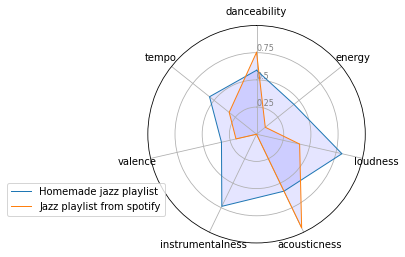

In [156]:
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.25,0.5,0.75], ["0.25","0.5","0.75"], color="grey", size=8)
plt.ylim(0,1)

values=list_of_playlists[9].loc[0].drop(columns_to_drop).values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Homemade jazz playlist")
ax.fill(angles, values, 'b', alpha=0.1)

values=dance_scaled.loc[0].drop(columns_to_drop_dowloaded).values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Jazz playlist from spotify")
ax.fill(angles, values, 'b', alpha=0.1)


# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.3))

# Show the graph
plt.show()

In [5]:
sp = spotipy.Spotify(
    client_credentials_manager=SpotifyClientCredentials(
    client_id=keys.client_id2,
    client_secret=keys.client_secret2))

In [151]:
dance_playlist = "https://open.spotify.com/playlist/37i9dQZF1DXa2PsvJSPnPf?si=f45b062acb414cac"

In [152]:
songs_data_list = []
trackinfo = {"name" :[],"audio_features":[]}
my_playlist = sp.playlist_tracks(playlist_id=dance_playlist)
for track in my_playlist['items']:
    trackinfo["name"] += track['track']['name'],
    trackinfo["audio_features"] += sp.audio_features(track['track']['id'])
songs = pd.DataFrame.from_dict(trackinfo)
songs = pd.concat([songs,songs['audio_features'].apply(pd.Series)],axis=1).drop('audio_features',axis=1)

In [153]:
dance = songs.drop(['type','id','uri','track_href','analysis_url'],axis=1)

In [154]:
dance.set_index(['name'], inplace = True)
minmax = MinMaxScaler(feature_range=(0,1))
dance_scaled = minmax.fit_transform(dance)
dance_scaled = pd.DataFrame(dance_scaled, columns = dance.columns, index = dance.index)

In [155]:
dance_scaled = dance_scaled.reset_index()